In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [5]:
observations = pd.read_csv("observations.csv")
pd.set_option('display.width', 200)  # Ajusta el ancho de impresión

print(observations.head())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [6]:
species = pd.read_csv("species_info.csv")
pd.set_option('display.width', 200)  # Ajusta el ancho de impresión

print(species.head())

  category                scientific_name                                       common_names conservation_status
0   Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN
1   Mammal                      Bos bison                              American Bison, Bison                 NaN
2   Mammal                     Bos taurus  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN
3   Mammal                     Ovis aries  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN
4   Mammal                 Cervus elaphus                                      Wapiti Or Elk                 NaN


In [7]:
# CARACTERÍSTICAS DEL LOS DATOS

print(f"Filas y columnas de observaciones: {observations.shape}")
print(f"Filas y columnas de especies: {species.shape}")

Filas y columnas de observaciones: (23296, 3)
Filas y columnas de especies: (5824, 4)


Explorar los datos 

Primero voy a ver qué datos se encuentran en las especies (qué especies hay, las columnas)

In [8]:
print(species.nunique().sum())
print(species.columns.unique())



11056
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [9]:
# Saber las categorías de especies que hay
print(f"numero de categorías: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

numero de categorías: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [10]:
print(species.groupby("category").size())

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


Hay una columna que resulta de interés: conservation_status

In [11]:
print(species.conservation_status.unique())
print(species.groupby("conservation_status").size())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [12]:
# Cantidad de valores na
print(f"Valores nan: {species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

Valores nan: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


Ahora toca analizar las observaciones


In [13]:
print(observations.columns)
print()

print(f"Cantidad de parques: {observations.park_name.nunique()}")
print(f"Parques: {observations.park_name.unique()}")


Index(['scientific_name', 'park_name', 'observations'], dtype='object')

Cantidad de parques: 4
Parques: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Limpieza de los datos

Se va a llevar el mismo orden que arriba, primero se analizará species y conservation status. Se pudieron visualizar datos faltantes y se deben tratar

In [14]:
species.fillna(("No risk"), inplace=True)
print(species.conservation_status.unique())

['No risk' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


El siguiente código es para conocer la distribución del estatus de conservación de las diferentes especies.

In [15]:
print(species.groupby("conservation_status").size())

conservation_status
Endangered              16
In Recovery              4
No risk               5633
Species of Concern     161
Threatened              10
dtype: int64


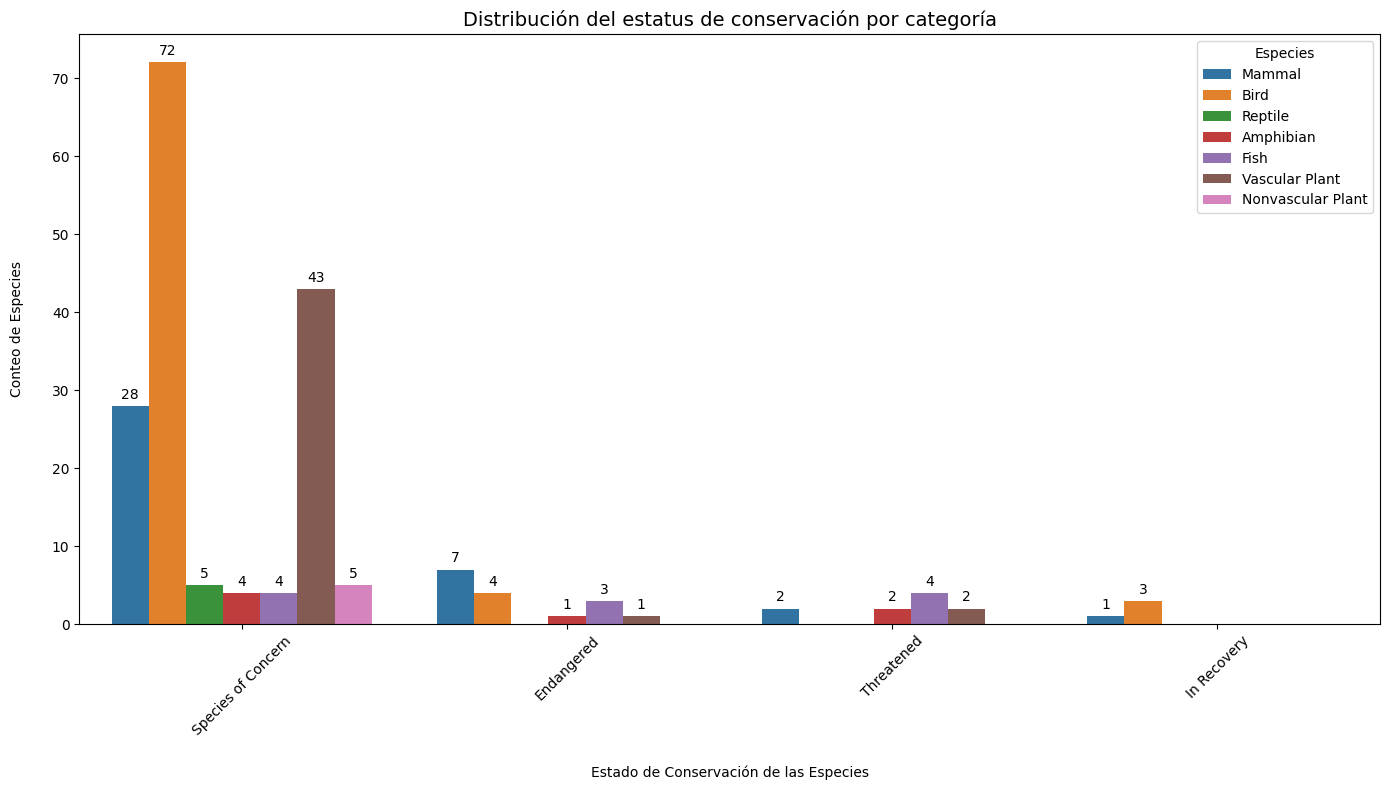

In [16]:
filtered_species = species[species.conservation_status != "No risk"]


plt.figure(figsize=(14, 8))

ax = sns.countplot(x="conservation_status", hue="category", data=filtered_species)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)


plt.title('Distribución del estatus de conservación por categoría', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Estado de Conservación de las Especies", labelpad=20)
plt.ylabel("Conteo de Especies", labelpad=20)
plt.tight_layout()
plt.legend(title="Especies")
plt.show()

Ahora me interesa saber qué especie es más propensa a estar en peligro/"Endangered"

In [17]:
endangered_filter = species[species.conservation_status == "Endangered"]
most_common_category = endangered_filter['category'].value_counts().idxmax()

print(f"La categoría de especies más propensa a estar en peligro es: {most_common_category}")


La categoría de especies más propensa a estar en peligro es: Mammal


Ahora nos interesa saber si la diferencia entre las especies y su estado de conservación es significativa.
Para conocer la relevancia de sus diferencias se usara una prueba de chi-cuadrado de independencia, que es ideal para analizar relaciones entre dos variables categóricas.



In [18]:
contingency = pd.crosstab(species['category'], species['conservation_status'])


In [19]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)

print("Estadístico chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)

Estadístico chi-cuadrado: 628.581965798279
Valor p: 2.4551423165990197e-117
Grados de libertad: 24


In [20]:
if p < 0.05:
    print("Existe una diferencia significativa entre la categoría y el estatus de conservación.")
else:
    print("No se encontró una diferencia significativa entre la categoría y el estatus de conservación.")


Existe una diferencia significativa entre la categoría y el estatus de conservación.


Ahora quiero saber qué especies se vieron más en cada parque

In [21]:
observations.dropna()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [22]:
spotted = observations.groupby(["park_name", "scientific_name"]).observations.sum().reset_index()

print(spotted)

                    park_name                      scientific_name  observations
0         Bryce National Park                        Abies bifolia           109
1         Bryce National Park                       Abies concolor            83
2         Bryce National Park                        Abies fraseri           109
3         Bryce National Park                 Abietinella abietina           101
4         Bryce National Park                    Abronia ammophila            92
...                       ...                                  ...           ...
22159  Yosemite National Park      Zonotrichia leucophrys gambelii           169
22160  Yosemite National Park      Zonotrichia leucophrys oriantha           135
22161  Yosemite National Park                  Zonotrichia querula           160
22162  Yosemite National Park                 Zygodon viridissimus           159
22163  Yosemite National Park  Zygodon viridissimus var. rupestris           210

[22164 rows x 3 columns]


                                 park_name        scientific_name  observations
1359                   Bryce National Park          Columba livia           339
10534  Great Smoky Mountains National Park  Streptopelia decaocto           256
13534            Yellowstone National Park         Holcus lanatus           805
19178               Yosemite National Park   Hypochaeris radicata           505



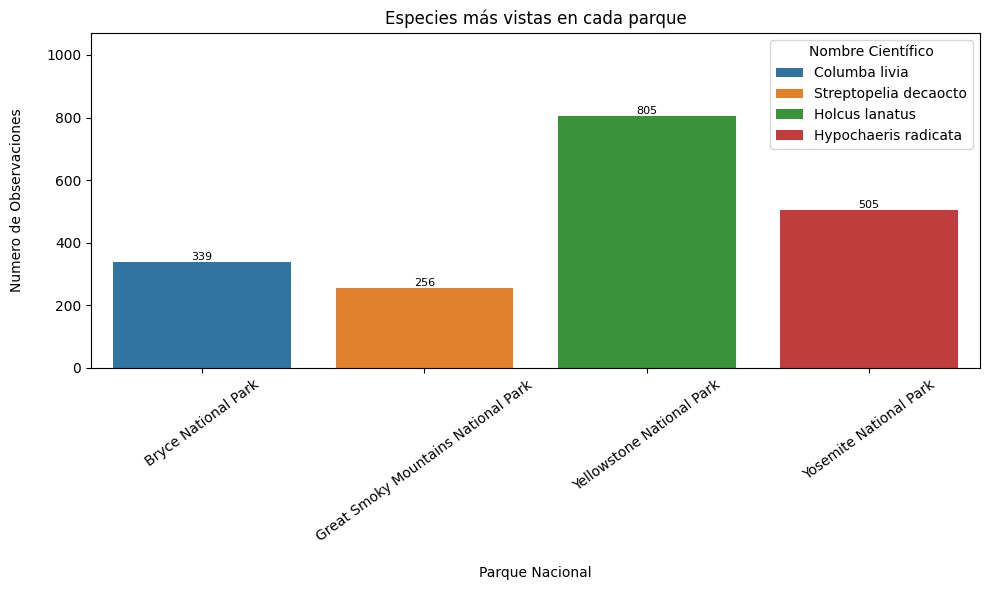

In [ ]:
most_spotted_species = spotted.loc[spotted.groupby("park_name")["observations"].idxmax()]
print(most_spotted_species)

print()

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=most_spotted_species, x="park_name", y="observations", hue="scientific_name", dodge=False)

# Poner la cantidad de observaciones encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)


# Aumentar el rango superior del eje y para dejar más espacio
max_obs = most_spotted_species["observations"].max()
plt.ylim(0, max_obs * 1.33)  # Esto aumenta el rango superior en un 20%

plt.title("Especies más vistas en cada parque")
plt.xticks(rotation=36)
plt.xlabel("Parque Nacional", labelpad=16)
plt.ylabel("Numero de Observaciones", labelpad=16)
plt.tight_layout()
plt.legend(title="Nombre Científico")
plt.show()
plt.close() 